# Analysing US Medical Insurance data
#### Portfolio project

Step 1: Importing the insurance.csv file.

In [2]:
import csv
def import_file(file):
    insurance_data = []
    with open(file) as data_file:
        data_reader = csv.DictReader(data_file)
        for row in data_reader:
            insurance_data.append(row)
    # print("Total number of persons in the dataset : {}".format(len(insurance_data)))
    return insurance_data

Step 2: Creating separate lists for each of the columns.

In [3]:
file_name = 'D:/Learning/Codeacademy_projects/portfolio-proj-1/data_files/insurance.csv'
imported_data = import_file(file_name)
headers_list = list(imported_data[0])
age_list = []
sex_list = []
bmi_list = []
children_list = []
smoker_list = []
region_list = []
charges_list = []

for row in imported_data:
    age_list.append(int(row['age']))
    sex_list.append(row['sex'])
    bmi_list.append(float(row['bmi']))
    children_list.append(int(row['children']))
    smoker_list.append(row['smoker'])
    region_list.append(row['region'])
    charges_list.append(float(row['charges']))

Step 3: Analyse the dataset

###### 3.1 - Descriptive stats on age

In [39]:
import statistics

all_gender = set(sex_list)
all_smoker = set(smoker_list)
all_regions = set(region_list)


gender_x_ages = {}
for gender in all_gender:
    gender_x_ages[gender] = []
    for row in imported_data:
        if row['sex'] == gender:
            gender_x_ages[gender].append(int(row['age']))

region_x_ages = {}
for region in all_regions:
    region_x_ages[region] = []
    for row in imported_data:
        if row['region'] == region:
            region_x_ages[region].append(int(row['age']))

smoker_x_ages = {}
for smoker in all_smoker:
    smoker_x_ages[smoker] = []
    for row in imported_data:
        if row['smoker'] == smoker:
            smoker_x_ages[smoker].append(int(row['age']))

#print avg age for each gender
for gender in gender_x_ages:
    print("Avg age of {} is : {}".format(gender, round(statistics.mean(gender_x_ages[gender]),2)))

#print avg age for each region
for region in region_x_ages:
    print("Avg age of {} region is : {}".format(region, round(statistics.mean(region_x_ages[region]),2)))

#print avg age for each smoker status
for status in smoker_x_ages:
    print("Avg age of {} smoking is : {}".format(status, round(statistics.mean(smoker_x_ages[status]),2)))

# print("The average age of the dataset is: {}".format(statistics.mean(age_list)))
# print("The max age of the dataset is: {}".format(max(age_list)))
# print("The min age of the dataset is: {}".format(min(age_list)))
# print("The median age of the dataset is: {}".format(statistics.median(age_list)))

# print("The average of males in the dataset: {}".format())
# male_ages = [sex if sex='male' for sex in sex_list]

#organise the code in functions..

#can make sets to indetify unique values for each column
#and can get counts for each value.
# can make dicts for averages and counts etc..
# relax and do the project. Don't rush through it..

Avg age of male is : 38.92
Avg age of female is : 39.5
Avg age of northwest region is : 39.2
Avg age of southwest region is : 39.46
Avg age of southeast region is : 38.94
Avg age of northeast region is : 39.27
Avg age of yes smoking is : 38.51
Avg age of no smoking is : 39.39


Summary stats on categorical variables

###### on Gender, Smoker and Region.

In [4]:
import statistics

# Get all unique values in the respective columns.
all_gender = set(sex_list)
all_smoker = set(smoker_list)
all_regions = set(region_list)

print("How many persons of each gender?")
for gender in all_gender:
    print("total {}s: {}".format(gender, sex_list.count(gender)))
    sm_count = 0
    for row in imported_data:
        if(row['sex'] == gender and row['smoker'] == 'yes'):
            sm_count += 1
    sm_pct = round(sm_count / sex_list.count(gender) *100,1)
    print("Smokers: {}({}%)".format(sm_count,sm_pct))

print("\nHow many smokers?")
print("Total smokers: {}".format(smoker_list.count("yes")))

print("\nHow many persons from each region?")
for region in all_regions:
    print("{}: {}".format(region,region_list.count(region)))
    sm_count = 0
    for row in imported_data:
        if(row['region'] == region and row['smoker'] == 'yes'):
            sm_count += 1
    sm_pct = round(sm_count / region_list.count(region) *100,1)
    print("Smokers: {}({}%)".format(sm_count,sm_pct))



How many persons of each gender?
total females: 662
Smokers: 115(17.4%)
total males: 676
Smokers: 159(23.5%)

How many smokers?
Total smokers: 274

How many persons from each region?
southwest: 325
Smokers: 58(17.8%)
northwest: 325
Smokers: 58(17.8%)
southeast: 364
Smokers: 91(25.0%)
northeast: 324
Smokers: 67(20.7%)


Summary stats on Numerical variables
###### on age, bmi, children and charges.

In [9]:
print("Average age: {}".format(round(statistics.mean(age_list),2)))
print("Median age: {}".format(round(statistics.median(age_list),2)))
print("Mode age: {}".format(round(statistics.mode(age_list),2)))

Average age: 39.21
Median age: 39.0
Mode age: 18


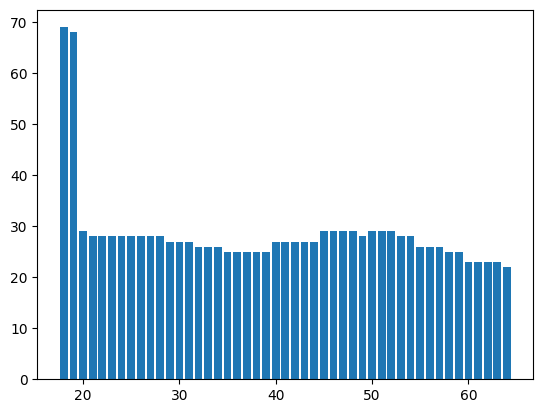

Standard deviation of ages: 14.04
IQR of ages: 24.0


In [38]:
import matplotlib.pyplot as plt
import numpy as np

all_ages = set(age_list)
ages_count = dict.fromkeys(all_ages,0)
for row in imported_data:
    ages_count[int(row['age'])] += 1

x = np.array(list(ages_count.keys()))
y = np.array(list(ages_count.values()))

plt.bar(x,y)
plt.show()

print("Standard deviation of ages: {}".format(round(statistics.pstdev(age_list),2)))
print("IQR of ages: {}".format(round(np.quantile(age_list,0.75) - np.quantile(age_list,0.25),2)))

age 18 and 19 are the modal ages and 39 is the mean and median age.

summary stats on bmi

Average bmi: 30.66
Median bmi: 30.4
Mode bmi: 32.3


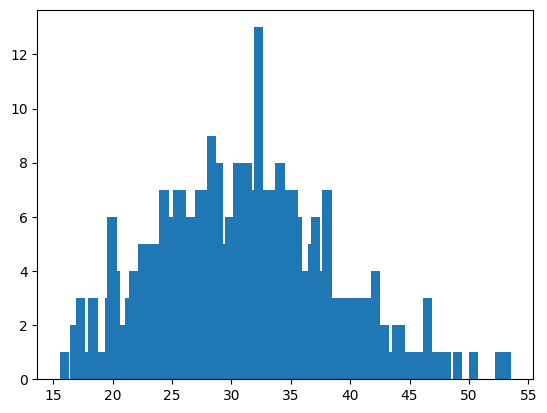

Standard deviation of ages: 6.1
IQR of ages: 8.4


In [41]:
print("Average bmi: {}".format(round(statistics.mean(bmi_list),2)))
print("Median bmi: {}".format(round(statistics.median(bmi_list),2)))
print("Mode bmi: {}".format(round(statistics.mode(bmi_list),2)))

all_bmis = set(bmi_list)
bmis_count = dict.fromkeys(all_bmis,0)
for row in imported_data:
    bmis_count[float(row['bmi'])] += 1

x = np.array(list(bmis_count.keys()))
y = np.array(list(bmis_count.values()))

plt.bar(x,y)
plt.show()

print("Standard deviation of ages: {}".format(round(statistics.pstdev(bmi_list),2)))
print("IQR of ages: {}".format(round(np.quantile(bmi_list,0.75) - np.quantile(bmi_list,0.25),2)))

summary stats on number of children

Average count: 1.09
Median count: 1.0
Mode count: 0


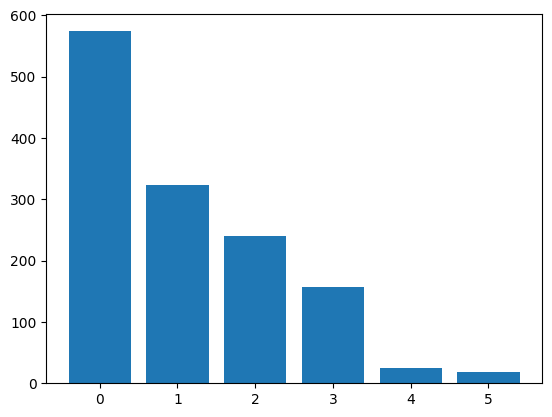

Standard deviation of ages: 1.21
IQR of ages: 2.0


In [60]:
print("Average count: {}".format(round(statistics.mean(children_list),2)))
print("Median count: {}".format(round(statistics.median(children_list),2)))
print("Mode count: {}".format(round(statistics.mode(children_list),2)))

all_children = set(children_list)
children_count = dict.fromkeys(all_children,0)
for row in imported_data:
    children_count[float(row['children'])] += 1

x = np.array(list(children_count.keys()))
y = np.array(list(children_count.values()))

plt.bar(x,y)
plt.show()

print("Standard deviation of ages: {}".format(round(statistics.pstdev(children_list),2)))
print("IQR of ages: {}".format(round(np.quantile(children_list,0.75) - np.quantile(children_list,0.25),2)))

summary stats on charges

Average charges: 13270.42
Median charges: 9382.03
Mode charges: 1639.56
min charges: 1121.8739
max charges: 63770.42801
[10000, 20000, 30000, 40000, 50000, 60000, 70000]
[712, 353, 111, 83, 72, 4, 3]


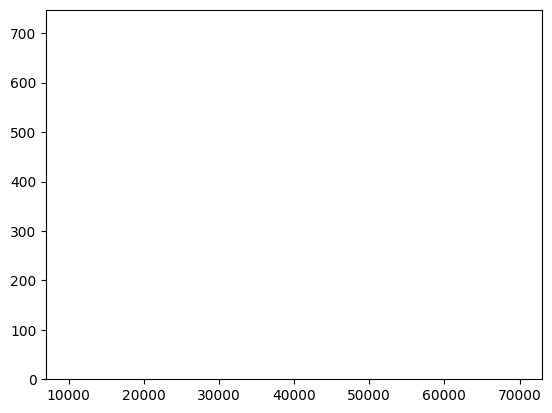

Standard deviation of ages: 12105.48
IQR of ages: 11899.63


In [59]:
print("Average charges: {}".format(round(statistics.mean(charges_list),2)))
print("Median charges: {}".format(round(statistics.median(charges_list),2)))
print("Mode charges: {}".format(round(statistics.mode(charges_list),2)))
print("min charges: {}".format(min(charges_list)))
print("max charges: {}".format(max(charges_list)))

all_charges = set(charges_list)
groups_charges = {10000:0,20000:0,30000:0,40000:0,50000:0,60000:0,70000:0}
charges_count = dict.fromkeys(all_charges,0)
for row in imported_data:
    charges_count[float(row['charges'])] += 1
    if(float(row['charges']) < 10000.0):
        groups_charges[10000] += 1
    elif(float(row['charges']) < 20000.0):
        groups_charges[20000] += 1
    elif(float(row['charges']) < 30000.0):
        groups_charges[30000] += 1
    elif(float(row['charges']) < 40000.0):
        groups_charges[40000] += 1
    elif(float(row['charges']) < 50000.0):
        groups_charges[50000] += 1
    elif(float(row['charges']) < 60000.0):
        groups_charges[60000] += 1
    elif(float(row['charges']) < 70000.0):
        groups_charges[70000] += 1

x = np.array(list(groups_charges.keys()))
y = np.array(list(groups_charges.values()))
# print(list(groups_charges.keys()))
# print(list(groups_charges.values()))

plt.bar(x,y)
plt.show()

print("Standard deviation of ages: {}".format(round(statistics.pstdev(charges_list),2)))
print("IQR of ages: {}".format(round(np.quantile(charges_list,0.75) - np.quantile(charges_list,0.25),2)))